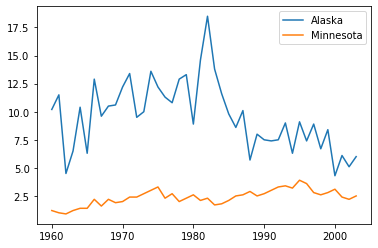

In [1]:
#1.1
import pandas as pd
import numpy as np
from matplotlib import pyplot
get_ipython().run_line_magic('matplotlib', 'inline')
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Murder Rate']]
St_Alaska=data[data['State']=='Alaska']
St_Alaska=pd.DataFrame(St_Alaska[['Year','Murder Rate']])
St_Alaska=St_Alaska.rename(columns={'Murder Rate':'Murder rate in Alaska'})
St_Minnesota=data[data['State']=='Minnesota']
St_Minnesota=pd.DataFrame(St_Minnesota[['Murder Rate']]).reset_index()
St_Alaska['Murder rate in Minnesota']=St_Minnesota['Murder Rate']
pyplot.plot(St_Alaska['Year'],St_Alaska['Murder rate in Alaska'],label='Alaska')
pyplot.plot(St_Alaska['Year'],St_Alaska['Murder rate in Minnesota'],label='Minnesota')
pyplot.legend()


['California' 'Mississippi' 'Texas' 'New York' 'Louisiana']


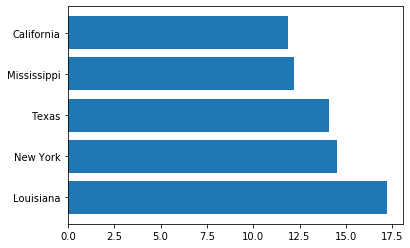

In [2]:
#1.3
import pandas as pd
import numpy as np
from matplotlib import pyplot
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Murder Rate']]
def most_murderous(year):
    grp=data.groupby('Year')
    get_data=grp.get_group(year)
    top_five=get_data.sort_values('Murder Rate',ascending=False).head(5).reset_index()[['State','Murder Rate']]
    arr=np.array(top_five['State'])
    print(arr[::-1])
    pyplot.barh(top_five['State'],top_five['Murder Rate'])
most_murderous(1990)

In [3]:
#1.4
import pandas as pd
import numpy as np
from matplotlib import pyplot
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Population','Murder Rate']]
california_murder_rate=data[(data['State']=='California') & (data['Year']==1988)].reset_index()[['Population','Murder Rate']]
california_murders=((california_murder_rate['Population']*california_murder_rate['Murder Rate'])/100000).tolist()
california_murder_rate_1975=data[(data['State']=='California') & (data['Year']==1975)].reset_index()[['Population','Murder Rate']]
california_murders_1975=((california_murder_rate_1975['Population']*california_murder_rate_1975['Murder Rate'])/100000).tolist()
ca_change=california_murders[0]-california_murders_1975[0]
ca_change=np.round(ca_change)
print(f" People murdered:{ca_change}")


 People murdered:726.0


In [7]:
#2.1
import pandas as pd
import numpy as np
from matplotlib import pyplot
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Murder Rate']]
changes_by_state =[]
Negative_values=[]
Positive_values=[]
num_changes=[]
def two_year_changes (values, n):
    val=[]
    val2=[]
    a=np.array(values)[n:] - np.array(values)[:-n]
    b=np.array(values)[n:]
    c=np.array(values)[:-n]
    for temp in range(len(b)):
        if b[temp]>c[temp]:
            val.append(True)
        if b[temp]<c[temp]:
            val2.append(False)
        else:
            continue
    changes_by_state.append(len(val)-len(val2))
for state_one in data['State'].unique():
       years=data[data['State']==state_one]['Year'].tolist()
       rates=data[data['State']==state_one]['Murder Rate'].tolist()
       two_year_changes(rates,2)
print(changes_by_state)
print()
print()



[-5, -6, -1, 1, 17, -4, 4, -3, -6, -3, -2, 4, -3, 8, 5, 5, -6, 8, 2, 9, 5, -4, 6, 0, -2, 0, -10, 1, 5, -3, 10, -1, 5, 3, 3, 1, -1, 5, 6, -11, -3, -2, 2, 5, -8, -1, 6, 1, 3, 0]




In [6]:
#2.2
data1=pd.DataFrame(df['State'].unique())
data1.columns = ['State']
data1['Murder Rate two_year_changes']=pd.DataFrame(changes_by_state)
print(data1)
print()
print()

             State  Murder Rate two_year_changes
0           Alaska                            -5
1          Alabama                            -6
2         Arkansas                            -1
3          Arizona                             1
4       California                            17
5         Colorado                            -4
6      Connecticut                             4
7         Delaware                            -3
8          Florida                            -6
9          Georgia                            -3
10          Hawaii                            -2
11            Iowa                             4
12           Idaho                            -3
13        Illinois                             8
14         Indiana                             5
15          Kansas                             5
16        Kentucky                            -6
17       Louisiana                             8
18      Massachuse                             2
19        Maryland  

In [8]:
#2.3
for minus in changes_by_state:
    if '-' in str(minus):
        Negative_values.append(minus)
    else:
        Positive_values.append(minus)
total_change=len(Positive_values)-len(Negative_values)
print(f"Total_changes is :{total_change}")
print()

Total_changes is :8



In [9]:
#2.4
for state in data['State'].unique():
    g=data[data['State']==state]
    year=g['Year']
    num_change.append(len(np.array(year)[2:]-np.array(year)[:-2]))
print(f'num_changes : {sum(num_change)}')


num_changes : 2100


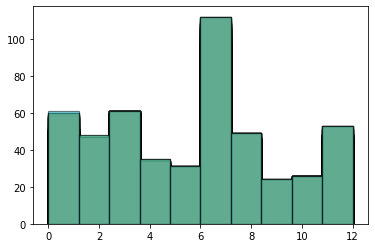

In [11]:
#2.6&2.7
import pandas as pd
import numpy as np
from matplotlib import pyplot
import random
get_ipython().run_line_magic('matplotlib', 'inline')
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Murder Rate']]
changes_by_state =[]
final_random_samples=[]
for sample in range(500):
    def final_diff(change):
        Negative_values=[]
        Positive_values=[]
        for minus in change:
            if '-' in str(minus):
                Negative_values.append(minus)
        
            else:
                Positive_values.append(minus)
    
        total_changes=len(Positive_values)-len(Negative_values)
        final_random_samples.append(total_changes+5)
    def two_year_changes (values, n):
        val=[]
        val2=[]
        a=np.array(values)[n:] - np.array(values)[:-n]
        b=np.array(values)[n:]
        c=np.array(values)[:-n]
        for temp in range(len(b)):
            if b[temp]>c[temp]:
                val.append(True)
            if b[temp]<c[temp]:
                val2.append(False)
            else:
                continue
        changes_by_state.append(len(val)-len(val2))
    

    for state_one in data['State'].unique():
       
           rates=data[data['State']==state_one]['Murder Rate'].tolist()
           two_year_changes(rates,2)
    random_value=random.randrange(3,43)
    final_diff(changes_by_state[:random_value])
    pyplot.hist(final_random_samples,alpha=0.5,edgecolor='black', linewidth=1.2)

In [12]:
#3.3
import pandas as pd
import numpy as np
from matplotlib import pyplot
import random
data=pd.read_csv('Downloads\\crime_rates-1.csv')
data=data[['State','Year','Population','Murder Rate']]
data1=data[(data['State']!='Alaska') & (data['State']!='Hawaii') & (data['State']!='Maine') & (data['State']!='Michigan') & (data['State']!='Wisconsin')&(data['State']!='Minnesota')].reset_index()
data1=data1.rename(columns={"Murder Rate": 'death_penalty_murder_rates'})
print(data1)
states=data1['State'].unique()
count=0
count1=0
data_year_1971=data1[data1['Year']==1971]['death_penalty_murder_rates'].reset_index()['death_penalty_murder_rates']
data_year_1973=data1[data1['Year']==1973]['death_penalty_murder_rates'].reset_index()['death_penalty_murder_rates']
data3=pd.DataFrame(states)
data3.columns=['State']
data3[1971]=data_year_1971
data3[1973]=data_year_1973

      index    State  Year  Population  death_penalty_murder_rates
0        44  Alabama  1960     3266740                        12.4
1        45  Alabama  1961     3302000                        12.9
2        46  Alabama  1962     3358000                         9.4
3        47  Alabama  1963     3347000                        10.2
4        48  Alabama  1964     3407000                         9.3
...     ...      ...   ...         ...                         ...
1931   2195  Wyoming  1999      480000                         2.3
1932   2196  Wyoming  2000      493782                         2.4
1933   2197  Wyoming  2001      494423                         1.8
1934   2198  Wyoming  2002      498830                         3.0
1935   2199  Wyoming  2003      501242                         2.8

[1936 rows x 5 columns]


In [13]:
#3.4
data3['Diff']=data3[1973]-data3[1971]
for a in data3['Diff']:
    if '-' in str(a):
        count+=1
    else:
        count1+=1
changes_72 =count1-count
print(f"Test Statistic 1971 to 1973:{changes_72}")


Test Statistic 1971 to 1973:22


P-Value is : 0.02380476095219044


(array([371., 131., 261., 232., 223., 456., 262., 110., 126., 127., 549.,
        541., 232., 140., 224., 364., 133., 135., 132., 251.]),
 array([-2. , -0.8,  0.4,  1.6,  2.8,  4. ,  5.2,  6.4,  7.6,  8.8, 10. ,
        11.2, 12.4, 13.6, 14.8, 16. , 17.2, 18.4, 19.6, 20.8, 22. ]),
 <a list of 20 Patch objects>)

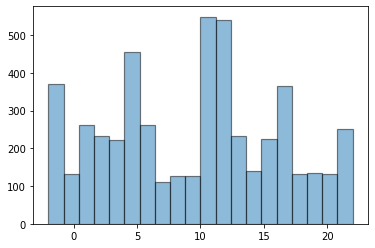

In [14]:
#3.5
import random
from matplotlib import pyplot
get_ipython().run_line_magic('matplotlib', 'inline')
test_values=[]
for samples in range(5000):
    def simulation(Values):
        count=0
        count1=0
        for a in data3['Diff'][:Values]:
            if '-' in str(a):
                count+=1
            else:
                count1+=1
        changes_72 =count1-count
        test_values.append(changes_72)
    random_value=random.randrange(1,43)
    simulation(random_value)
#Question 3.6
test_values=np.array(test_values)
empirical_P=np.count_nonzero(test_values >= changes_72 ) / samples
print(f'P-Value is : {empirical_P}')
pyplot.hist(test_values,bins=20,alpha=0.5,edgecolor='black',linewidth=1.2)

In [15]:
#4.1
import random
from matplotlib import pyplot
from datascience import Table
import datascience as ds
test_values=[]
uniform = Table().with_columns("Change", ds.make_array('Increase', 'Decrease'),"Chance", ds.make_array(0.5,0.5))
test_statistics=uniform.sample_from_distribution('Chance', 100)

def run_test(size):
    test_values.append(uniform.sample_from_distribution('Chance',100).column(2).item(0)-uniform.sample_from_distribution('Chance', 100).column(2).item(1))
          
for sample_test in range(5000):
    run_test(44)  
test_values1=np.array(test_values)
empirical_P=np.count_nonzero(test_values1>=22) / sample_test
print(f"P-Value :{empirical_P}")

P-Value :0.0010002000400080016


    Year  Death penalty states  No death penalty states
0   1960              5.279545                 3.550000
1   1961              4.777273                 3.683333
2   1962              4.615909                 2.333333
3   1963              4.613636                 2.750000
4   1964              4.711364                 3.400000
5   1965              4.827273                 3.183333
6   1966              5.431818                 4.516667
7   1967              5.875000                 3.733333
8   1968              6.270455                 4.733333
9   1969              6.502273                 4.733333
10  1970              7.147727                 5.116667
11  1971              7.513636                 6.066667
12  1972              7.765909                 6.300000
13  1973              8.120455                 5.800000
14  1974              8.554545                 7.300000
15  1975              8.454545                 6.866667
16  1976              7.552273                 6

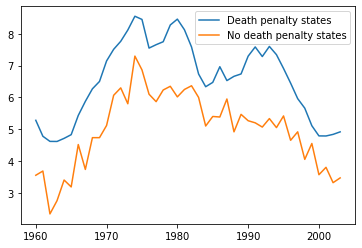

In [21]:
#5.1
import pandas as pd
import numpy as np
from matplotlib import pyplot
import random
data=pd.read_csv('Downloads\\crime_rates-1.csv')
mean_difference=[]
mean_difference_six_states=[]
data=data[['State','Year','Population','Murder Rate']]
data1=data[(data['State']!='Alaska') & (data['State']!='Hawaii') & (data['State']!='Maine') & (data['State']!='Michigan') & (data['State']!='Wisconsin')&(data['State']!='Minnesota')].reset_index()
data_frame=data1['Year'].unique()
d=data1.groupby('Year')
for year in data_frame:
    group=d.get_group(year)
    mean_difference.append(group['Murder Rate'].mean())
data7=data[(data['State']=='Alaska') | (data['State']=='Hawaii') | (data['State']=='Maine') | (data['State']=='Michigan') | (data['State']=='Wisconsin')|(df['State']=='Minnesota')].reset_index()
d2=data7.groupby('Year')
for year_no in data_frame:
    group1=d2.get_group(year_no)
    mean_difference_six_states.append(group1['Murder Rate'].mean())
avg_murder_rates=pd.DataFrame(data_frame)
avg_murder_rates.columns=['Year']
avg_murder_rates['Death penalty states']=mean_difference
avg_murder_rates['No death penalty states']=mean_difference_six_states
print(avg_murder_rates)


#5.2
pyplot.plot(avg_murder_rates['Year'],avg_murder_rates['Death penalty states'],label='Death penalty states')
pyplot.plot(avg_murder_rates['Year'],avg_murder_rates['No death penalty states'],label='No death penalty states')
pyplot.legend()


NameError: name 'data_frame_final' is not defined